# SMA Crossover Strategy

* Buy at market price if the fast SMA is greater than the slow SMA
* If in the market, sell if the fast SMA is smaller than the slow SMA
* Only 1 active operation is allowed in the market

In [1]:
%matplotlib inline

from typing import List

import backtrader as bt
import pandas as pd
from matplotlib import pyplot as plt
from utils import CryptoPandasData

## 1. Reading Data

In [2]:
from utils import read_bars as read_bars_tmp

def read_bars(csv_file: str)->pd.DataFrame:
    TIME_BEGIN = pd.to_datetime('2020-05-09T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-05-15T00:00:00.000Z')
    bars_df = read_bars_tmp(csv_file)
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp_end'] < TIME_END)]
    return bars_df

In [3]:
time_bars = read_bars('/data/bars/TimeBar/60000/TimeBar.60000.Binance.Swap.BTC_USDT.csv')

In [4]:
time_bars

,exchange,market_type,pair,bar_type,bar_size,timestamp,timestamp_end,open,high,low,...,volume,volume_sell,volume_buy,volume_quote,volume_quote_sell,volume_quote_buy,count,count_sell,count_buy,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-09 00:00:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-09 00:00:00+00:00,2020-05-09 00:01:00+00:00,9809.629883,9813.250000,9789.969727,...,1008.39600,215.396000,793.000000,9882771.0,2111057.80,9882556.0,1258,462,796,9800.486119
2020-05-09 00:01:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-09 00:01:00+00:00,2020-05-09 00:02:00+00:00,9794.059570,9799.129883,9772.410156,...,1198.93700,529.573000,669.364000,11730592.0,5182406.50,11730062.0,2013,838,1175,9784.160469
2020-05-09 00:02:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-09 00:02:00+00:00,2020-05-09 00:03:00+00:00,9783.639648,9792.879883,9760.000000,...,1730.49200,732.479000,998.013000,16919128.0,7162894.50,16918394.0,2494,1117,1377,9777.062246
2020-05-09 00:03:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-09 00:03:00+00:00,2020-05-09 00:04:00+00:00,9770.530273,9773.419922,9731.860352,...,3147.55600,1281.505000,1866.051000,30687044.0,12495101.00,30685762.0,4130,1836,2294,9749.483091
2020-05-09 00:04:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-09 00:04:00+00:00,2020-05-09 00:05:00+00:00,9760.940430,9797.000000,9755.009766,...,1287.73400,810.601000,477.133000,12586653.0,7923817.00,12585843.0,2205,1350,855,9774.264716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14 23:54:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-14 23:54:00+00:00,2020-05-14 23:55:00+00:00,9782.389648,9789.000000,9781.709961,...,135.79199,99.256996,36.535000,1328679.8,971229.94,1328580.5,240,137,103,9784.669921
2020-05-14 23:55:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-14 23:55:00+00:00,2020-05-14 23:56:00+00:00,9786.919922,9793.280273,9785.889648,...,124.05800,54.246998,69.811000,1214447.2,531026.30,1214393.0,286,123,163,9789.350143
2020-05-14 23:56:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-14 23:56:00+00:00,2020-05-14 23:57:00+00:00,9786.280273,9791.879883,9782.000000,...,126.75100,66.317000,60.434002,1240437.4,649066.70,1240371.1,336,170,166,9786.411153


In [5]:
from utils import CryptoPandasData

data_feed = CryptoPandasData(dataname=time_bars, timeframe=bt.TimeFrame.Minutes)

## 2. SMA Crossover Strategy Demo

In [6]:
def sma_cross_demo(data_feed: bt.feeds.PandasData)->None:
    cerebro = bt.Cerebro()
    cerebro.addstrategy(bt.strategies.MA_CrossOver, fast=128, slow=512)
    cerebro.adddata(data_feed)

    cerebro.broker.setcash(10000.0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.broker.setcommission(commission=0.0004)  # Binance Swap taker fee

    cerebro.addsizer(bt.sizers.FixedSize, stake=1)

    cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, compression=1, factor=365, annualize=True)

    results = cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

    plt.rcParams['figure.figsize'] = (16, 8)
    cerebro.plot(iplot=False)

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10440.47
Sharpe Ratio:  0.26936215606006514


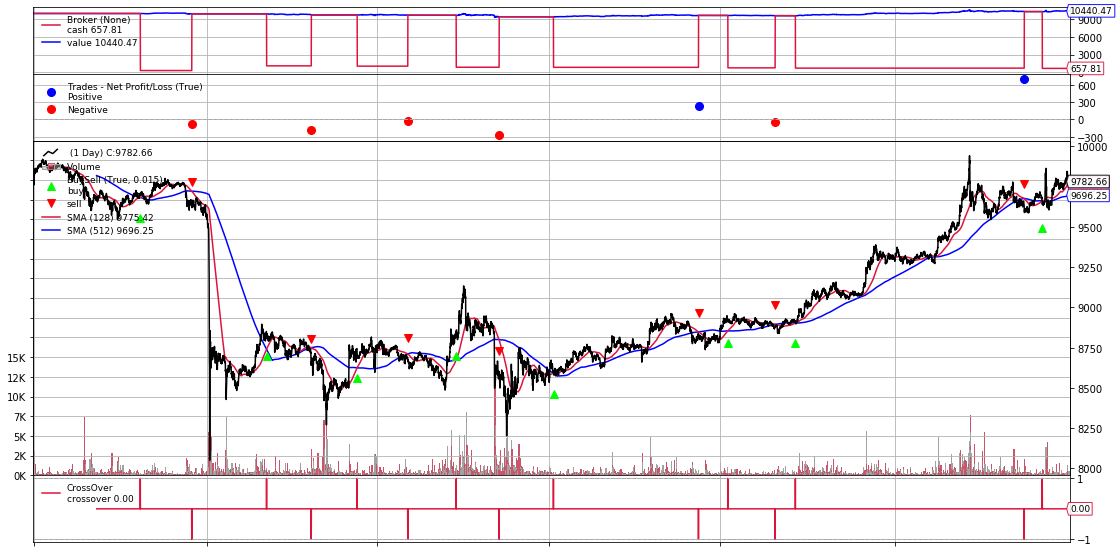

In [7]:
sma_cross_demo(data_feed)

## 3. Searching for Optimal Parameters with Backtesting

In [8]:
def grid_search(data_feed: bt.feeds.PandasData, fast: List[int], slow: List[int])->List[List[bt.cerebro.OptReturn]]:
    cerebro = bt.Cerebro()
    cerebro.optstrategy(bt.strategies.MA_CrossOver, fast=fast, slow=slow)
    cerebro.adddata(data_feed)

    cerebro.broker.setcash(10000.0)
    cerebro.broker.setcommission(commission=0.0004)  # Binance Swap taker fee

    cerebro.addsizer(bt.sizers.FixedSize, stake=1)

    # Add analyzers
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, factor=365)
    cerebro.addanalyzer(bt.analyzers.VWR, timeframe=bt.TimeFrame.Days, tann=365)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.NoTimeFrame)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.NoTimeFrame, data=data_feed, _name='buyandhold')

    return cerebro.run()

In [9]:
def get_perf(results: List[List[bt.cerebro.OptReturn]])->pd.DataFrame:
    stats = []
    for i in results:
        for j in i:
            stats.append(
                {'strategy': f'SMA_Cross_{j.params.fast}_{j.params.slow}',
                 'sharpe_ratio': j.analyzers.sharperatio.get_analysis()['sharperatio'],
                 'return': '{0:.2f}%'.format(list(j.analyzers.timereturn.get_analysis().values())[0] * 100),
                 'buy_and_hold': '{0:.2f}%'.format(list(j.analyzers.buyandhold.get_analysis().values())[0] * 100),
                 'vwr': j.analyzers.vwr.get_analysis()['vwr'],
                }
            )
    df = pd.DataFrame(stats)
    df.sort_values(by='sharpe_ratio', ascending=False, inplace=True)
    df.set_index('strategy', inplace=True)
    return df

In [10]:
results = grid_search(data_feed, fast=[32, 64, 128], slow=[256, 512, 1024])

In [11]:
get_perf(results)

,sharpe_ratio,return,buy_and_hold,vwr
strategy,,,,
SMA_Cross_128_256,0.836609,6.25%,-0.27%,2404.326410
SMA_Cross_32_1024,0.421046,6.38%,-0.27%,2514.427799
SMA_Cross_64_1024,0.418949,6.90%,-0.27%,3364.772286
SMA_Cross_32_256,0.330479,3.23%,-0.27%,364.730491
SMA_Cross_64_256,0.321372,3.15%,-0.27%,351.374198
SMA_Cross_128_512,0.269362,4.40%,-0.27%,763.090909
SMA_Cross_128_1024,0.217417,3.88%,-0.27%,530.449391
SMA_Cross_32_512,0.117269,1.47%,-0.27%,85.766105
SMA_Cross_64_512,0.069495,0.89%,-0.27%,41.967365


## References

* [Quickstart Guide - Backtrader](https://www.backtrader.com/docu/quickstart/quickstart/)
* [Benchmarking - Backtrader](https://www.backtrader.com/blog/posts/2016-07-22-benchmarking/benchmarking/)
* [Analyzer - VWR - Backtrader](https://www.backtrader.com/blog/posts/2016-09-06-vwr/vwr/)